Kiersten Wener and Eli Chesnut

We will be using the F1-Score. It is the best choice for our dog-vs-cat classification task because it balances precision and recall, making it ideal for scenarios where the dataset might be slightly imbalanced or when both types of errors—falsely classifying a cat as a dog or a dog as a cat—are equally important. While accuracy gives a broad sense of performance, it can be misleading in cases of imbalance. The F1-Score ensures that our model performs well not only in predicting the dominant class but also in identifying the minority class correctly, leading to a more reliable assessment of its real-world performance.

We want to minimize mis-identification, we want to get it right purposefully. This also will help in real world application when there might be an imbalance of testing data.

We will be using sh

In [15]:
import pandas as pd
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

print(pd.__version__)
print(np.__version__)




2.2.3
2.0.2


We can add a normalization layer to the sequential =

one hot encode and turn to numpy

In [16]:
from sklearn import metrics as mt
from matplotlib import pyplot as plt
from skimage.io import imshow
import seaborn as sns
%matplotlib inline
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
def summarize_net(net, X_test, y_test, title_text=''):
    plt.figure(figsize=(15,5))
    yhat = np.argmax(net.predict(X_test), axis=1)
    y_test_single = np.argmax(y_test, axis=1)


    acc = mt.accuracy_score(y_test_single,yhat)
    cm = mt.confusion_matrix(y_test_single,yhat)
    cm = cm/np.sum(cm,axis=1)[:,np.newaxis]
    sns.heatmap(cm, annot=True, fmt='.2f', xticklabels=class_names,yticklabels=class_names)
    plt.title(title_text+'{:.4f}'.format(acc))

In [17]:

import setuptools.dist
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten 
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import RandomFlip, RandomRotation
from tensorflow.keras.layers import SeparableConv2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Add, Input
from tensorflow.keras.layers import average, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomTranslation
from tensorflow.keras.layers import RandomContrast, RandomBrightness
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2 
from tensorflow.keras.metrics import Precision, Recall
# #start with alexnet convolutional phase
# # cnn = Sequential(name='3x3_kernel')
# # cnn.add( Conv2D(filters=16, kernel_size= (3,3), padding='same', input_shape=(32,32,3)))


# cnn = Sequential()

# # add in augmentations directly
# cnn.add( RandomFlip("horizontal") )
# cnn.add( RandomRotation(0.2) )

# # let's start with an AlexNet style convolutional phase
# cnn.add(Conv2D(filters=32,
#                 input_shape = (64,64,3),
#                 kernel_size=(3,3), 
#                 padding='same', 
#                 activation='relu')) # more compact syntax

# # no max pool before next conv layer!!
# cnn.add(Conv2D(filters=64,
#                 kernel_size=(3,3), 
#                 padding='same', 
#                 activation='relu')) # more compact syntax

# cnn.add(MaxPooling2D(pool_size=(2, 2)))
    

# # add one layer on flattened output
# cnn.add(Dropout(0.25)) # add some dropout for regularization after conv layers
# cnn.add(Flatten())
# cnn.add(Dense(128, activation='relu'))
# cnn.add(Dropout(0.5)) # add some dropout for regularization, again!
# cnn.add(Dense(2, activation='softmax'))

# # Let's train the model 
# cnn.compile(loss='categorical_crossentropy', # 'categorical_crossentropy' 'mean_squared_error'
#               optimizer='adam', # 'adadelta' 'rmsprop'
#               metrics=['accuracy'])

# cnn.build((None,64,64,3))

# cnn.summary()

# plot_model(
#     cnn, to_file='model.png', show_shapes=True, show_layer_names=True,
#     rankdir='LR', expand_nested=False, dpi=96
# )


In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,         # Randomly rotate images by up to 20 degrees
    width_shift_range=0.2,     # Randomly translate images horizontally
    height_shift_range=0.2,    # Randomly translate images vertically
    shear_range=0.15,          # Shear transformations
    zoom_range=0.15,           # Zoom in or out on images
    horizontal_flip=True,      # Flip images horizontally
    fill_mode='nearest',       # Fill in missing pixels after transformations
    rescale=1./255             # Normalize pixel values to [0, 1]
)

https://keras.io/api/datasets/cifar10/

https://www.cs.toronto.edu/~kriz/cifar.html



In [19]:
import numpy as np
import keras
from sklearn.model_selection import train_test_split

# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

# Flatten the arrays for easier processing
y_train = y_train.flatten()
y_test = y_test.flatten()

# Set the number of samples per class (160 for training, 40 for testing)
samples_per_class = 200
train_samples_per_class = 160
test_samples_per_class = 40

# Initialize lists to store the downsampled data
X_train_balanced = []
y_train_balanced = []
X_test_balanced = []
y_test_balanced = []

# For each class (0 through 9)
for class_id in range(10):
    # Get the indices of samples in each class
    train_indices = np.where(y_train == class_id)[0]
    test_indices = np.where(y_test == class_id)[0]

    # Shuffle and select the samples
    np.random.shuffle(train_indices)
    np.random.shuffle(test_indices)

    # Select the appropriate number of samples
    selected_train_indices = train_indices[:train_samples_per_class]
    selected_test_indices = test_indices[:test_samples_per_class]

    # Append the selected data and labels to the balanced lists
    X_train_balanced.append(X_train[selected_train_indices])
    y_train_balanced.append(y_train[selected_train_indices])
    X_test_balanced.append(X_test[selected_test_indices])
    y_test_balanced.append(y_test[selected_test_indices])

# Convert the lists to numpy arrays
X_train_balanced = np.concatenate(X_train_balanced)
y_train_balanced = np.concatenate(y_train_balanced)
X_test_balanced = np.concatenate(X_test_balanced)
y_test_balanced = np.concatenate(y_test_balanced)

# Print the class distribution
print(f"Class distribution in training set: {np.bincount(y_train_balanced)}")
print(f"Class distribution in test set: {np.bincount(y_test_balanced)}")

# Verify the shapes of the new datasets
print(f"X_train_balanced shape: {X_train_balanced.shape}")
print(f"X_test_balanced shape: {X_test_balanced.shape}")


Class distribution in training set: [160 160 160 160 160 160 160 160 160 160]
Class distribution in test set: [40 40 40 40 40 40 40 40 40 40]
X_train_balanced shape: (1600, 32, 32, 3)
X_test_balanced shape: (400, 32, 32, 3)


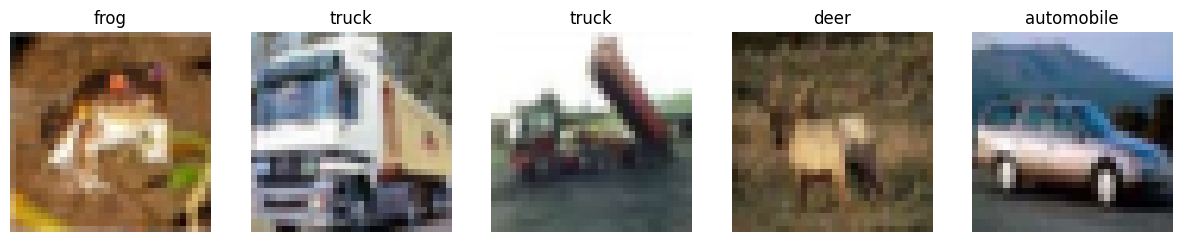

In [20]:
plt.figure(figsize=(15, 10))
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for i in range(5):
    plt.subplot(1, 5, i + 1)  
    plt.title(class_names[y_train[i]])
    plt.imshow(X_train[i]) 
    plt.axis('off')  

plt.show()  # 


In [21]:
from tensorflow.keras.utils import to_categorical

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes =10)

import numpy as np

# Convert image data lists to NumPy arrays

X_test = np.array(X_test).astype('float32') / 255.0 
X_train = np.array(X_train).astype('float32') / 255.0 


https://medium.com/@abhishekjainindore24/all-about-convolutions-kernels-features-in-cnn-c656616390a1

The first model is an AlexNet convolutional model. It is relatively simple. It has two comvolutional layers, with max pooling only being applied after the second one. There is then dropout for regularization after the convolutional layers, and then two dense layers. 

Generally speaking, a kernel is a small matrix of weights, with the size specified in the code.  The kernel slides across the input image and does element-wise multiplication with the pixels and its weights. This then produces a feature map that highlights patterns/features in the images. 


In [ ]:


cnn = Sequential()

# add in augmentations directly
cnn.add( RandomFlip("horizontal") ) # flip horizontally
cnn.add( RandomRotation(0.05) ) # rotate by 5%
cnn.add( RandomTranslation(height_factor=0.1, width_factor=0.1) ) # move by 10%
cnn.add( RandomBrightness(factor=0.1, value_range=(0.0, 1.0)) ) # add some to the mean
cnn.add( RandomContrast(0.1) ) # add or decrease contrast
# let's start with an AlexNet style convolutional phase
cnn.add(Conv2D(filters=32,
                input_shape = (32,32,3),
                kernel_size=(3,3), 
                padding='same', 
                activation='relu')) # more compact syntax

# no max pool before next conv layer!!
cnn.add(Conv2D(filters=64,
                kernel_size=(3,3), 
                padding='same', 
                activation='relu')) # more compact syntax

cnn.add(MaxPooling2D(pool_size=(2, 2)))
    

# add one layer on flattened output
cnn.add(Dropout(0.25)) # add some dropout for regularization after conv layers
cnn.add(Flatten())
cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.5)) # add some dropout for regularization, again!
cnn.add(Dense(10, activation='softmax'))

# Let's train the model 
cnn.compile(loss='categorical_crossentropy', # 'categorical_crossentropy' 'mean_squared_error'
              optimizer='adam', # 'adadelta' 'rmsprop'
              metrics=['accuracy', 'recall', 'precision'])

cnn.build((None,32,32,3))

cnn.summary()

plot_model(
    cnn, to_file='model.png', show_shapes=True, show_layer_names=True,
    rankdir='LR', expand_nested=False, dpi=96
)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_flip_1 (RandomFlip)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation_1               │ (None, 32, 32, 3)      │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 128)            │     2,097,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,117,962 (8.08 MB)

 Trainable params: 2,117,962 (8.08 MB)

 Non-trainable params: 0 (0.00 B)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [23]:

history = cnn.fit(X_train, y_train, 
                  batch_size=64, 
                   epochs=30, verbose=1,
                   validation_data=(X_test, y_test)
                  )

Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 46s 58ms/step - accuracy: 0.2736 - loss: 1.9683 - precision: 0.5165 - recall: 0.0420 - val_accuracy: 0.4840 - val_loss: 1.4428 - val_precision: 0.7445 - val_recall: 0.2130
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 43s 55ms/step - accuracy: 0.4167 - loss: 1.6349 - precision: 0.6337 - recall: 0.1496 - val_accuracy: 0.5073 - val_loss: 1.3863 - val_precision: 0.7278 - val_recall: 0.2810
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 46s 58ms/step - accuracy: 0.4491 - loss: 1.5388 - precision: 0.6741 - recall: 0.2024 - val_accuracy: 0.5445 - val_loss: 1.2696 - val_precision: 0.7032 - val_recall: 0.3681
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 43s 55ms/step - accuracy: 0.4696 - loss: 1.4919 - precision: 0.6786 - recall: 0.2347 - val_accuracy: 0.5373 - val_loss: 1.3049 - val_precision: 0.6985 - val_recall: 0.3366
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 43s 55ms/step - accuracy: 0.4734 - loss: 1.4664 - precision: 0.6817 - recall: 0.2373 - val_accuracy: 0.5695 - va

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


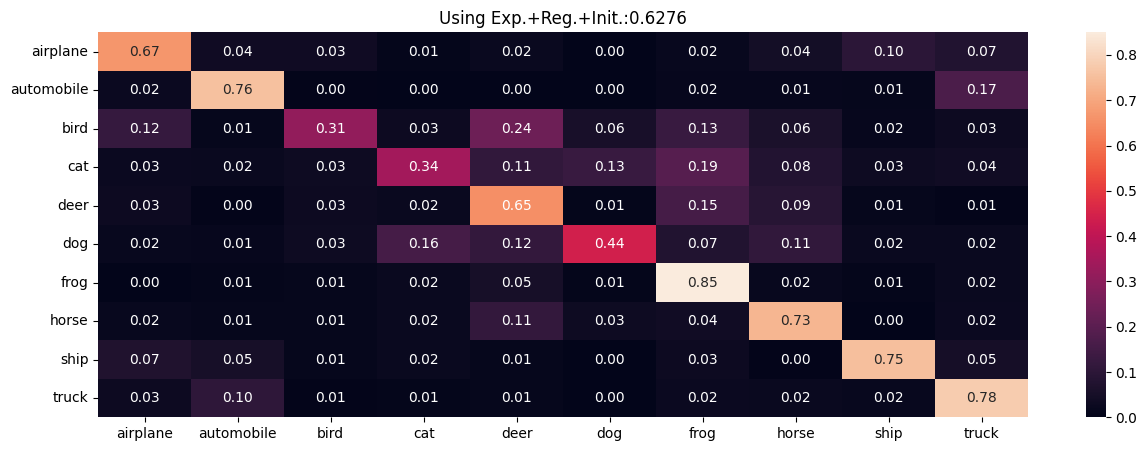

In [24]:
summarize_net(cnn, X_test, y_test, title_text='Using Exp.+Reg.+Init.:')

As we can see by this graph, the most common misclassifications mostly occur between the animals. Frogs are commonly misclassified as Cats and Deers. This makes logical sense, because animals often have the same general shape, with the same features like eyes, ears, and a nose. It would be much more worrisome if a frog was getting mistaken for an airplane frequently.

The same is happening with truck and automobile. These two classes have similar features so it makes logical sense that they would be mixed up with eachother. 

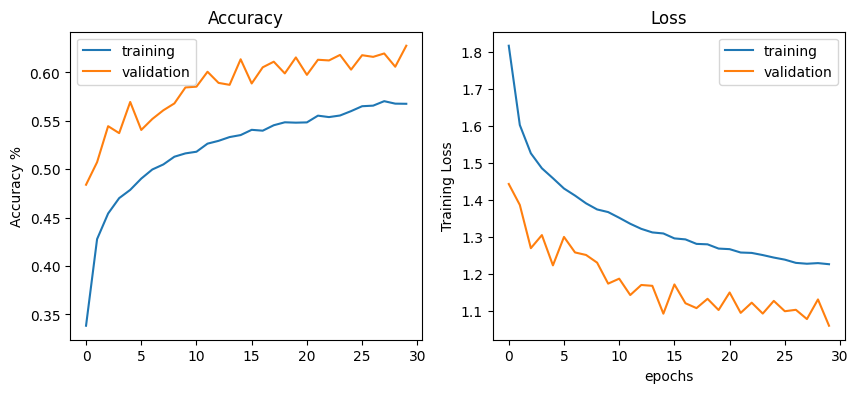

In [25]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='training')

plt.ylabel('Accuracy %')
plt.title('Training')
plt.plot(history.history['val_accuracy'], label='validation')
plt.title('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='training')
plt.ylabel('Training Loss')
plt.xlabel('epochs')

plt.plot(history.history['val_loss'], label='validation')
plt.xlabel('epochs')
plt.title('Loss')
plt.legend()
plt.show()

In [ ]:
recall_history1 = history.history['val_recall']  # Average recall across epochs
precision_history1 = history.history['val_precision']


f1_scores1 = 2 * (np.array(precision_history1) * np.array(recall_history1)) / (np.array(precision_history1) + np.array(recall_history1))

# Calculate the average F1 score
average_f1_score1 = np.mean(f1_scores1)

# Print the average F1 score
print("Average F1 Score:", average_f1_score1)


print(f'Highest validation recall across epochs: {np.max(recall_history1)}')
print(f'Highest validation precision across epochs: {np.max(precision_history1)}')

Average F1 Score: 0.5394572528232183
Avg validation recall across epochs: 0.43103333314259845
Avg validation precision across epochs: 0.7315341154734294


As we can see by the graphs above. which plot accuracy and loss for validation and testing data arcross eopochs, the models are converging. We can tell this by...

https://www.geeksforgeeks.org/how-to-choose-kernel-size-in-cnn/
https://medium.com/@vishnuam/dropout-in-convolutional-neural-networks-cnn-422a4a17da41#:~:text=Dropout%20improves%20generalization%3A%20It%20forces,generalize%20better%20to%20unseen%20data.

In the model below (cnn2), i slightly modified the alexnet style convolutional neural network. Traditionally, the kernel size of the first convolutional layer is 3 x 3, but I changed it to 2 x 2. "Smaller kernal sizes capture more local information, while larger kernel sizes capture intricate features". A kernel that is too small can lead to information loss but a kernel that is too big can lose the fine details in the input image. 

With the smaller kernel size, there will be 4 weights per filter, instead of 9 in the previous cnn. This reduces the number of multiplications and parameters in this model. Since the model is comparing different types of animals and has to differentiate between an automobile and truck, etc (which can be difficult even for humans), it is important for the model to pick up on the small details that may differentiate the images. This is why i chose to reduce the size of the kernel instead of increasing it. 

I increased the dropout rate from .25 to .4 for the fully connected layer (the dense layer), which means that half of the neurons in the layer are dropped in each iteration, instead of 1/4 like before. This decreases the risk of overfitting and encourages slower learning. It also increases the generalization of the model by increasing the noise during the training of the model. According to my research, smaller dropout rates, like .25 are better for the convolutional layers, which is why i left the first dropout rate as .25. It is good to use a larger dropout rate for the dense layers because of the large number of parameters, which can increase the risk of overfitting. 

In [ ]:


cnn2 = Sequential()

# add in augmentations directly
cnn2.add( RandomFlip("horizontal") ) # flip horizontally
cnn2.add( RandomRotation(0.05) ) # rotate by 5%
cnn2.add( RandomTranslation(height_factor=0.1, width_factor=0.1) ) # move by 10%
cnn2.add( RandomBrightness(factor=0.1, value_range=(0.0, 1.0)) ) # add some to the mean
cnn2.add( RandomContrast(0.1) ) # add or decrease contrast
# let's start with an AlexNet style convolutional phase
#here, changed kernel size to 2 x 2 instead of 3 x 3
cnn2.add(Conv2D(filters=32,
                input_shape = (32,32,3),
                kernel_size=(2,2), 
                padding='same', 
                activation='relu')) # more compact syntax

# no max pool before next conv layer!!
cnn2.add(Conv2D(filters=64,
                kernel_size=(3,3), 
                padding='same', 
                activation='relu')) # more compact syntax

cnn2.add(MaxPooling2D(pool_size=(2, 2)))
    

# add one layer on flattened output
cnn2.add(Dropout(0.25)) # increased the dropout from .25 to .35
cnn2.add(Flatten())
cnn2.add(Dense(128, activation='relu'))
cnn2.add(Dropout(0.4)) # add some dropout for regularization, again!
cnn2.add(Dense(10, activation='softmax'))

# Let's train the model 
cnn2.compile(loss='categorical_crossentropy', # 'categorical_crossentropy' 'mean_squared_error'
              optimizer='adam', # 'adadelta' 'rmsprop'
              metrics=['accuracy', 'recall', 'precision'])

cnn2.build((None,32,32,3))

cnn2.summary()

plot_model(
    cnn2, to_file='model.png', show_shapes=True, show_layer_names=True,
    rankdir='LR', expand_nested=False, dpi=96
)


/Users/kierstenwener/Desktop/MLLab6/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_flip_2 (RandomFlip)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation_2               │ (None, 32, 32, 3)      │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 32)     │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 128)            │     2,097,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,117,482 (8.08 MB)

 Trainable params: 2,117,482 (8.08 MB)

 Non-trainable params: 0 (0.00 B)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [28]:

history2 = cnn2.fit(X_train, y_train, 
                  batch_size=64, 
                   epochs=30, verbose=1,
                   validation_data=(X_test, y_test)
                  )

Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.3003 - loss: 1.9068 - precision: 0.5315 - recall: 0.0596 - val_accuracy: 0.4791 - val_loss: 1.4200 - val_precision: 0.6912 - val_recall: 0.2536
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step - accuracy: 0.4440 - loss: 1.5516 - precision: 0.6556 - recall: 0.1955 - val_accuracy: 0.5406 - val_loss: 1.2921 - val_precision: 0.7407 - val_recall: 0.3347
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.4826 - loss: 1.4505 - precision: 0.6842 - recall: 0.2550 - val_accuracy: 0.5583 - val_loss: 1.2382 - val_precision: 0.7160 - val_recall: 0.3857
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step - accuracy: 0.5052 - loss: 1.3899 - precision: 0.6913 - recall: 0.2896 - val_accuracy: 0.5517 - val_loss: 1.2787 - val_precision: 0.6916 - val_recall: 0.3989
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step - accuracy: 0.5180 - loss: 1.3644 - precision: 0.7032 - recall: 0.3066 - val_accuracy: 0.5751 - va

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


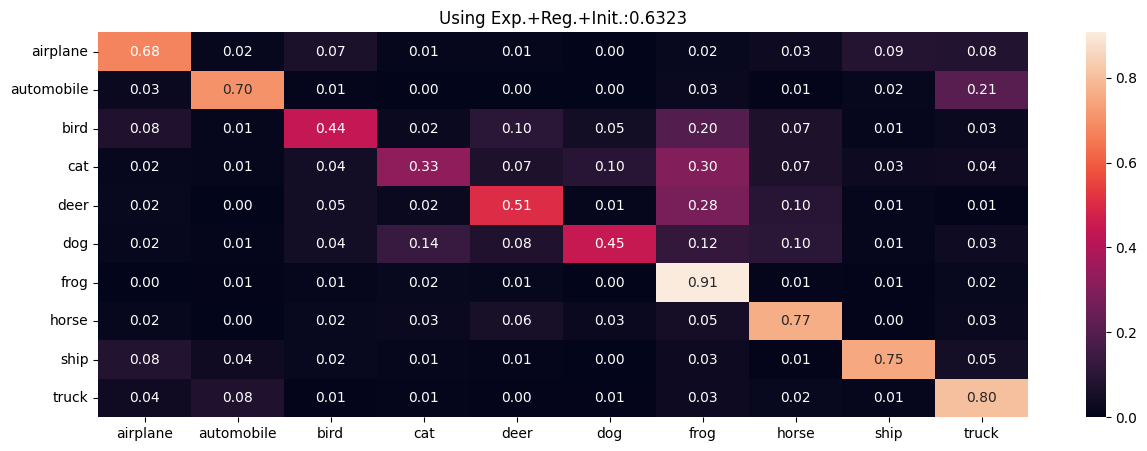

In [29]:
summarize_net(cnn2, X_test, y_test, title_text='Using Exp.+Reg.+Init.:')

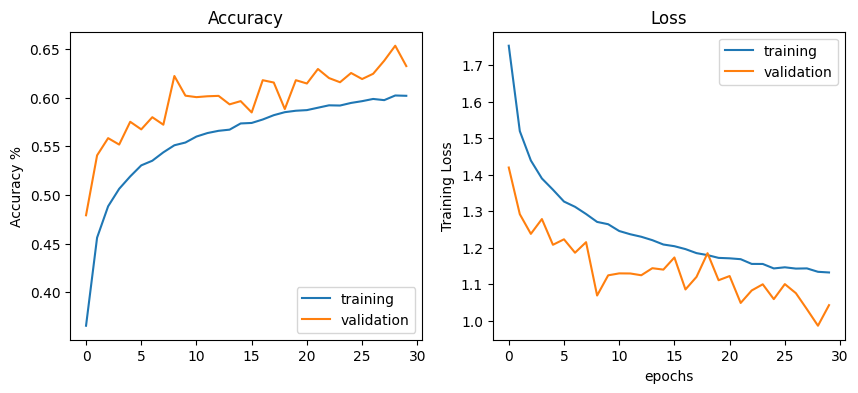

In [30]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history2.history['accuracy'], label='training')

plt.ylabel('Accuracy %')
plt.title('Training')
plt.plot(history2.history['val_accuracy'], label='validation')
plt.title('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history2.history['loss'], label='training')
plt.ylabel('Training Loss')
plt.xlabel('epochs')

plt.plot(history2.history['val_loss'], label='validation')
plt.xlabel('epochs')
plt.title('Loss')
plt.legend()
plt.show()

In [63]:
recall_history2 = history2.history['val_recall']  # Average recall across epochs
precision_history2 = history2.history['val_precision']

f1_scores2 = 2 * (np.array(precision_history2) * np.array(recall_history2)) / (np.array(precision_history2) + np.array(recall_history2))

# Calculate the average F1 score
average_f1_score2 = np.mean(f1_scores2)

# Print the average F1 score
print("Average F1 Score:", average_f1_score2)

print(f'Highest validation recall across epochs: {np.max(recall_history2)}')
print(f'Highest validation precision across epochs: {np.max(precision_history2)}')

Average F1 Score: 0.564310031358714
Highest validation recall across epochs: 0.531499981880188
Highest validation precision across epochs: 0.7757991552352905


In [ ]:
from tensorflow.keras.layers import Add, Input
from tensorflow.keras.layers import average, concatenate
from tensorflow.keras.models import Model
l2_lambda = 0.000001
input_holder = Input(shape=(32, 32, 3))

# start with a conv layer
x = RandomFlip("horizontal")(input_holder)  # Flip horizontally
x  = RandomRotation(0.05)(x)  # Rotate by 5%
x  = RandomTranslation(height_factor=0.1, width_factor=0.1)(x)  # Move by 10%
x  = RandomBrightness(factor=0.1, value_range=(0.0, 1.0))(x)  # Add brightness
x  = RandomContrast(0.1)(x)  # Add or decrease contrast

x = Conv2D(filters=32,
               input_shape = (32,32,3),
               kernel_size=(3,3),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu', 
               data_format="channels_last")(input_holder)

x = MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(x)

x = Conv2D(filters=32,
               kernel_size=(3,3),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu', 
               data_format="channels_last")(x)

x_split = MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(x)

x = Conv2D(filters=64,
               kernel_size=(1,1),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu', 
               data_format="channels_last")(x_split)

x = Conv2D(filters=64,
               kernel_size=(3,3),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu', 
               data_format="channels_last")(x)

x = Conv2D(filters=32,
               kernel_size=(1,1),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu', 
               data_format="channels_last")(x)

# now add back in the split layer, x_split (residual added in)
x = Add()([x, x_split])
x = Activation("relu")(x)

x = MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(x)

x = Flatten()(x)
x = Dropout(0.25)(x)
x = Dense(256)(x)
x = Activation("relu")(x)
x = Dropout(0.5)(x)
x = Dense(10)(x)
x = Activation('softmax')(x)

resnet = Model(inputs=input_holder,outputs=x)

resnet.summary()

/Users/kierstenwener/Desktop/MLLab6/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7       │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 32, 32,    │        896 │ input_layer_7[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 16, 16,    │          0 │ conv2d_6[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 16, 16,    │      9,248 │ max_pooling2d_3[… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 8, 8, 32)  │          0 │ conv2d_7[0][0]    │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 8, 8, 64)  │      2,112 │ max_pooling2d_4[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 8, 8, 64)  │     36,928 │ conv2d_8[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_10 (Conv2D)  │ (None, 8, 8, 32)  │      2,080 │ conv2d_9[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 8, 8, 32)  │          0 │ conv2d_10[0][0],  │
│                     │                   │            │ max_pooling2d_4[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_5        │ (None, 8, 8, 32)  │          0 │ add[0][0]         │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_5     │ (None, 4, 4, 32)  │          0 │ activation_5[0][… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_8 (Flatten) │ (None, 512)       │          0 │ max_pooling2d_5[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_6 (Dropout) │ (None, 512)       │          0 │ flatten_8[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_21 (Dense)    │ (None, 256)       │    131,328 │ dropout_6[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_6        │ (None, 256)       │          0 │ dense_21[0][0]    │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_7 (Dropout) │ (None, 256)       │          0 │ activation_6[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_22 (Dense)    │ (None, 10)        │      2,570 │ dropout_7[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_7        │ (None, 10)        │          0 │ dense_22[0][0]    │
│ (Activation)        │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 185,162 (723.29 KB)

 Trainable params: 185,162 (723.29 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
resnet.compile(loss='categorical_crossentropy', # 'categorical_crossentropy' 'mean_squared_error'
                optimizer='adam', # 'adadelta' 'rmsprop'
                metrics=['accuracy', 'recall', 'precision'])


In [44]:
history3 = resnet.fit(X_train, y_train, batch_size=64, 
                      epochs=30, verbose=1,
                      validation_data=(X_test,y_test),
                      callbacks=[EarlyStopping(monitor='val_loss', patience=10)]
                     )

Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 0.7722 - loss: 0.6460 - precision: 0.8435 - recall: 0.7018 - val_accuracy: 0.7697 - val_loss: 0.6858 - val_precision: 0.8501 - val_recall: 0.6843
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.7739 - loss: 0.6306 - precision: 0.8481 - recall: 0.7061 - val_accuracy: 0.7635 - val_loss: 0.6911 - val_precision: 0.8498 - val_recall: 0.6717
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - accuracy: 0.7735 - loss: 0.6352 - precision: 0.8444 - recall: 0.7041 - val_accuracy: 0.7620 - val_loss: 0.7081 - val_precision: 0.8386 - val_recall: 0.6858
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - accuracy: 0.7823 - loss: 0.6149 - precision: 0.8526 - recall: 0.7165 - val_accuracy: 0.7520 - val_loss: 0.7194 - val_precision: 0.8277 - val_recall: 0.6836
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - accuracy: 0.7833 - loss: 0.6073 - precision: 0.8480 - recall: 0.7183 - val_accuracy: 0.7620 - va

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


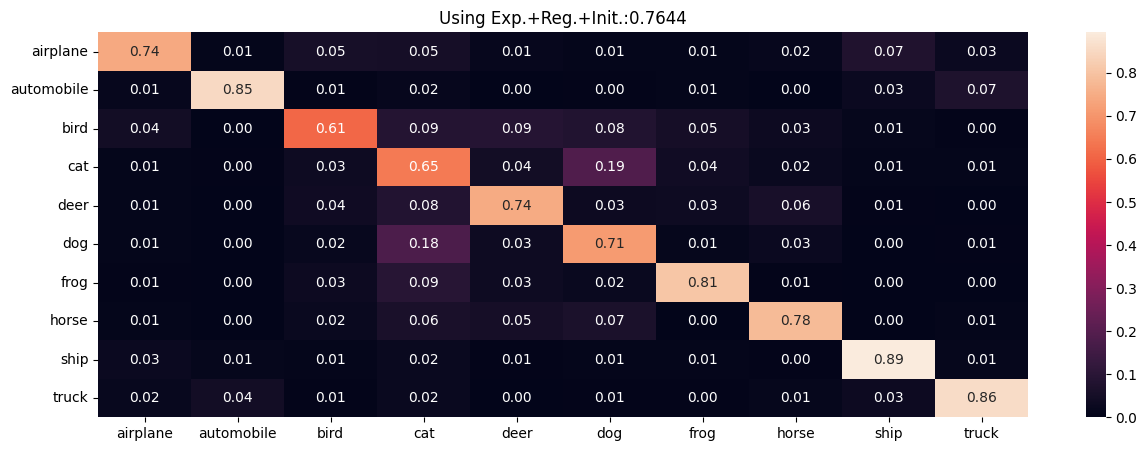

In [45]:
summarize_net(resnet, X_test, y_test, title_text='Using Exp.+Reg.+Init.:')

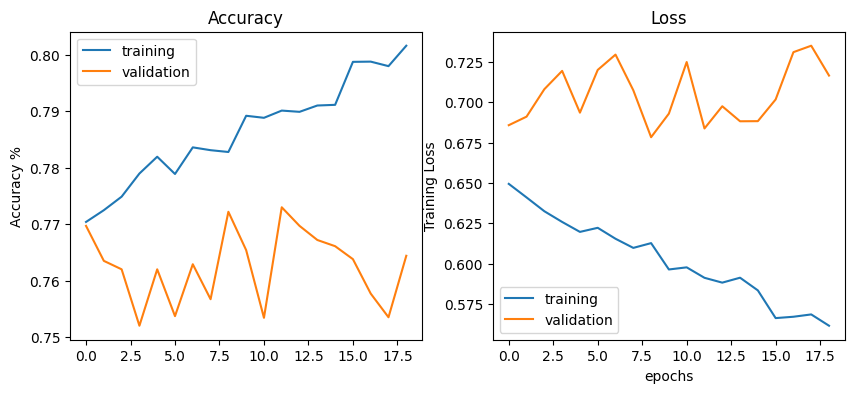

In [46]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history3.history['accuracy'], label='training')

plt.ylabel('Accuracy %')
plt.title('Training')
plt.plot(history3.history['val_accuracy'], label='validation')
plt.title('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history3.history['loss'], label='training')
plt.ylabel('Training Loss')
plt.xlabel('epochs')

plt.plot(history3.history['val_loss'], label='validation')
plt.xlabel('epochs')
plt.title('Loss')
plt.legend()
plt.show()

In [62]:
recall_history3 = history3.history['val_recall']  # Average recall across epochs
precision_history3 = history3.history['val_precision']


f1_scores3 = 2 * (np.array(precision_history3) * np.array(recall_history3)) / (np.array(precision_history3) + np.array(recall_history3))

# Calculate the average F1 score
average_f1_score3 = np.mean(f1_scores3)

# Print the average F1 score
print("Average F1 Score:", average_f1_score3)
print(f'highest validation recall across epochs: {np.max(recall_history3)}')
print(f'highest validation precision across epochs: {np.max(precision_history3)}')

Average F1 Score: 0.7557654200387154
highest validation recall across epochs: 0.7129999995231628
highest validation precision across epochs: 0.8500621318817139


changes kernal sizes

https://massedcompute.com/faq-answers/?question=Can+increasing+the+number+of+filters+in+a+convolutional+neural+network+always+improve+its+performance%3F#:~:text=The%20number%20of%20filters%20in%20a%20CNN%20determines%20the%20number,image%20classification%20or%20object%20detection. 

increase the filters :  According to my research, it is good to start with a smaller number of filters in the initial layers, and then increase them in the later layers

I changed lots of the filter numbers. The larger number of filters helps the 

In [ ]:
from tensorflow.keras.layers import Add, Input
from tensorflow.keras.layers import average, concatenate
from tensorflow.keras.models import Model
l2_lambda = 0.000001
input_holder2 = Input(shape=(32, 32, 3))

# start with a conv layer
#Here, changed kernel size to 2 x 2 instead of traditional 3 x 3
x2 = RandomFlip("horizontal")(input_holder2)  # Flip horizontally
x2 = RandomRotation(0.05)(x2)  # Rotate by 5%
x2 = RandomTranslation(height_factor=0.1, width_factor=0.1)(x2)  # Move by 10%
x2 = RandomBrightness(factor=0.1, value_range=(0.0, 1.0))(x2)  # Add brightness
x2 = RandomContrast(0.1)(x2)  # Add or decrease contrast


x2 = Conv2D(filters=32,
               input_shape = (32,32,3),
               kernel_size=(2,2),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu', 
               data_format="channels_last")(input_holder2)

x2 = MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(x2)

x2 = Conv2D(filters=64,
               kernel_size=(3,3),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu', 
               data_format="channels_last")(x2)

x_split2 = MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(x2)

#increasing filtert number since filters increases
x2 = Conv2D(filters=64,
               kernel_size=(2,2),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu', 
               data_format="channels_last")(x_split2)

x2 = Conv2D(filters=64,
               kernel_size=(3,3),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu', 
               data_format="channels_last")(x2)

#increased filters to 128
x2 = Conv2D(filters=64,
               kernel_size=(2,2),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu', 
               data_format="channels_last")(x2)

# now add back in the split layer, x_split (residual added in)
x2 = Add()([x2, x_split2])
x2 = Activation("relu")(x2)

x2 = MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(x2)

#increased dropout here
x2 = Flatten()(x2)
x2 = Dropout(0.4)(x2)
x2 = Dense(256)(x2)
x2 = Activation("relu")(x2)
x2 = Dropout(0.5)(x2)
x2 = Dense(10)(x2)
x2 = Activation('softmax')(x2)

resnet2 = Model(inputs=input_holder2,outputs=x2)

resnet2.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_11      │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_26 (Conv2D)  │ (None, 32, 32,    │        416 │ input_layer_11[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_13    │ (None, 16, 16,    │          0 │ conv2d_26[0][0]   │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_27 (Conv2D)  │ (None, 16, 16,    │     18,496 │ max_pooling2d_13… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_14    │ (None, 8, 8, 64)  │          0 │ conv2d_27[0][0]   │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_28 (Conv2D)  │ (None, 8, 8, 64)  │     16,448 │ max_pooling2d_14… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_29 (Conv2D)  │ (None, 8, 8, 64)  │     36,928 │ conv2d_28[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_30 (Conv2D)  │ (None, 8, 8, 64)  │     16,448 │ conv2d_29[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_4 (Add)         │ (None, 8, 8, 64)  │          0 │ conv2d_30[0][0],  │
│                     │                   │            │ max_pooling2d_14… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_11       │ (None, 8, 8, 64)  │          0 │ add_4[0][0]       │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_15    │ (None, 4, 4, 64)  │          0 │ activation_11[0]… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_10          │ (None, 1024)      │          0 │ max_pooling2d_15… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_10          │ (None, 1024)      │          0 │ flatten_10[0][0]  │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_25 (Dense)    │ (None, 256)       │    262,400 │ dropout_10[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_12       │ (None, 256)       │          0 │ dense_25[0][0]    │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_11          │ (None, 256)       │          0 │ activation_12[0]… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_26 (Dense)    │ (None, 10)        │      2,570 │ dropout_11[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_13       │ (None, 10)        │          0 │ dense_26[0][0]    │
│ (Activation)        │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴─────────────────

 Total params: 353,706 (1.35 MB)

 Trainable params: 353,706 (1.35 MB)

 Non-trainable params: 0 (0.00 B)

changes the learning rate here 

In [50]:
from sklearn.metrics import make_scorer,f1_score
from tensorflow.keras.optimizers import Adam

resnet2.compile(loss='categorical_crossentropy', # 'categorical_crossentropy' 'mean_squared_error'
                optimizer= Adam(learning_rate=0.0001), # 'adadelta' 'rmsprop'
                metrics=['accuracy', 'recall', 'precision'])


In [51]:
history4 = resnet2.fit(X_train, y_train, batch_size=64, 
                      epochs=30, verbose=1,
                      validation_data=(X_test,y_test),
                      callbacks=[EarlyStopping(monitor='val_loss', patience=4)]
                     )

Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 28ms/step - accuracy: 0.1392 - loss: 2.5650 - precision: 0.1529 - recall: 0.0109 - val_accuracy: 0.3727 - val_loss: 1.7745 - val_precision: 0.6764 - val_recall: 0.0278
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.3171 - loss: 1.8383 - precision: 0.5322 - recall: 0.0632 - val_accuracy: 0.4301 - val_loss: 1.5717 - val_precision: 0.6827 - val_recall: 0.1095
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.3860 - loss: 1.6559 - precision: 0.5870 - recall: 0.1274 - val_accuracy: 0.4790 - val_loss: 1.4507 - val_precision: 0.7214 - val_recall: 0.2079
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.4345 - loss: 1.5440 - precision: 0.6396 - recall: 0.1888 - val_accuracy: 0.5137 - val_loss: 1.3499 - val_precision: 0.7480 - val_recall: 0.2464
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 0.4657 - loss: 1.4594 - precision: 0.6550 - recall: 0.2387 - val_accuracy: 0.5390 - va

In [52]:
y_pred = resnet2.predict(X_test)

# Convert the predictions and true labels to the same shape if necessary (e.g., one-hot to class labels)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Compute F1 score (macro average for multi-class classification)
f1 = f1_score(y_true_classes, y_pred_classes, average='macro')
print(f"F1 Score: {f1}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
F1 Score: 0.7083778473520865


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


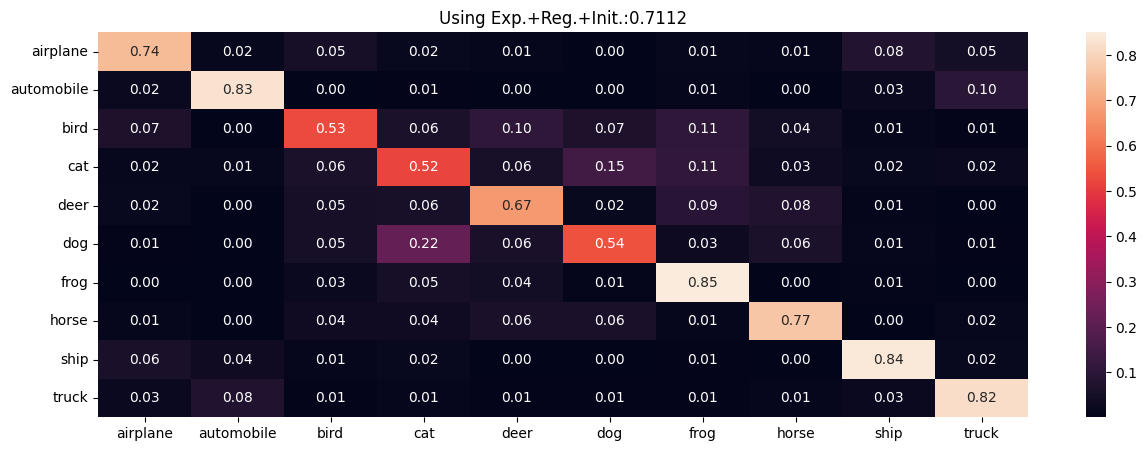

In [53]:
summarize_net(resnet2, X_test, y_test, title_text='Using Exp.+Reg.+Init.:')

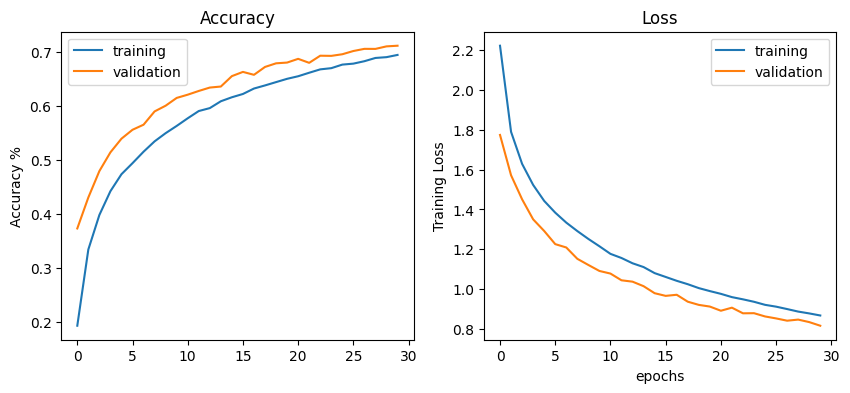

In [54]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history4.history['accuracy'], label='training')

plt.ylabel('Accuracy %')
plt.title('Training')
plt.plot(history4.history['val_accuracy'], label='validation')
plt.title('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history4.history['loss'], label='training')
plt.ylabel('Training Loss')
plt.xlabel('epochs')

plt.plot(history4.history['val_loss'], label='validation')
plt.xlabel('epochs')
plt.title('Loss')
plt.legend()
plt.show()

In [55]:
recall_history4 = history4.history['val_recall']  # Average recall across epochs
precision_history4 = history4.history['val_precision']
f1_scores4 = 2 * (np.array(precision_history4) * np.array(recall_history4)) / (np.array(precision_history4) + np.array(recall_history4))

# Calculate the average F1 score
average_f1_score4 = np.mean(f1_scores4)

# Print the average F1 score
print("Average F1 Score:", average_f1_score4)

print(f'Avg validation  recall across epochs: {np.mean(recall_history4)}')
print(f'Avg validation precision across epochs: {np.mean(precision_history4)}')


Average F1 Score: 0.5560079156108929
Avg validation  recall across epochs: 0.4466499983643492
Avg validation precision across epochs: 0.7847949425379436


MLP

In [58]:


# make a 3 layer keras MLP
mlp = Sequential()
mlp.add( Flatten() ) # make images flat for the MLP input
mlp.add( Dense(input_dim=1, units=30, 
               activation='relu') )
mlp.add( Dense(units=15, activation='relu') )
mlp.add( Dense(10) )
mlp.add( Activation('softmax') )

mlp.compile(loss='mean_squared_error',
              optimizer='rmsprop',
              metrics=['accuracy', 'recall', 'precision'])

history_mlp = mlp.fit(X_train, y_train, 
        batch_size=32, epochs=150, 
        shuffle=True, verbose=1,
        validation_data=(X_test, y_test))

Epoch 1/150
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 759us/step - accuracy: 0.2090 - loss: 0.0857 - precision: 0.4266 - recall: 0.0065 - val_accuracy: 0.3080 - val_loss: 0.0813 - val_precision: 0.5468 - val_recall: 0.0432
Epoch 2/150
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 632us/step - accuracy: 0.3107 - loss: 0.0802 - precision: 0.5629 - recall: 0.0619 - val_accuracy: 0.3377 - val_loss: 0.0786 - val_precision: 0.6293 - val_recall: 0.0579
Epoch 3/150
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 625us/step - accuracy: 0.3282 - loss: 0.0789 - precision: 0.5930 - recall: 0.0870 - val_accuracy: 0.2963 - val_loss: 0.0817 - val_precision: 0.5121 - val_recall: 0.0931
Epoch 4/150
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 617us/step - accuracy: 0.3485 - loss: 0.0774 - precision: 0.6089 - recall: 0.1084 - val_accuracy: 0.3484 - val_loss: 0.0771 - val_precision: 0.6030 - val_recall: 0.1224
Epoch 5/150
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 642us/step - accuracy: 0.3580 - loss: 0.0768 - precision: 0.6102 - recall: 0.1179 - val_accura

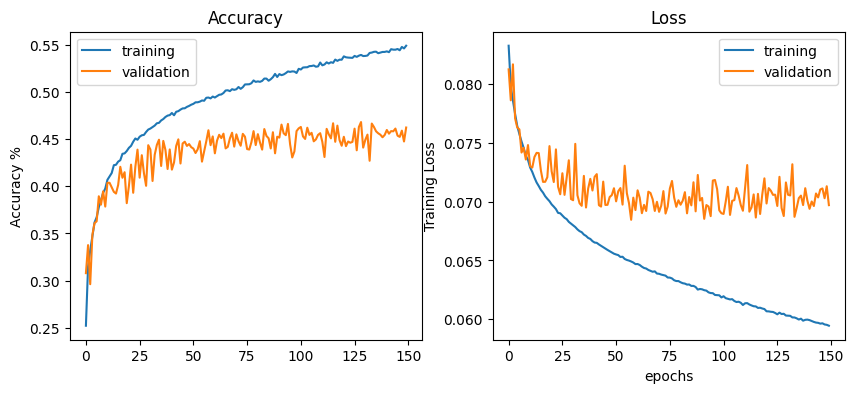

In [59]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history_mlp.history['accuracy'], label='training')

plt.ylabel('Accuracy %')
plt.title('Training')
plt.plot(history_mlp.history['val_accuracy'], label='validation')
plt.title('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_mlp.history['loss'], label='training')
plt.ylabel('Training Loss')
plt.xlabel('epochs')

plt.plot(history_mlp.history['val_loss'], label='validation')
plt.xlabel('epochs')
plt.title('Loss')
plt.legend()
plt.show()